# Topic: Using mini batch gradient descent as my iterative algorithm on SVM

In [1]:
using CSV, DataFrames, Statistics
# Load the Plot package for illustrating the solution
using Plots
# We also need some linear algebra functions
using LinearAlgebra
#DONE

In [2]:
cs_data_full = DataFrame( CSV.File( "./ftec-cs-full-train.csv" , missingstring=["NA", ""] ) );
# create a matrix of the full data
feat_vec_all_full = Matrix( cs_data_full[!, [ "RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans", 
            "age", "DebtRatio", "MonthlyIncome", "NumberRealEstateLoansOrLines", "NumberOfDependents" ]] );
label_vec_all_full = 2 .* cs_data_full.Default .- 1;
m = length( label_vec_all_full ); # storing the no of samples as "m".
#DONE

In [3]:
# Here is the testing dataset
cs_data_full_test = DataFrame( CSV.File( "./ftec-cs-full-test.csv" , missingstring=["NA", ""] ) );
# create a matrix of the full data
feat_vec_all_full_test = Matrix( cs_data_full_test[!, [ "RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans", 
            "age", "DebtRatio", "MonthlyIncome", "NumberRealEstateLoansOrLines", "NumberOfDependents" ]] );
label_vec_all_full_test = 2 .* cs_data_full_test.Default .- 1;
#DONE

In [4]:
function error_rate( feat_vec, label_vec, w, b)
    totalError = 0;
    numOfData = size(feat_vec, 1);
    for i in 1:numOfData
        if label_vec[i]*(dot(feat_vec[i,:],w)+b) < 0
            totalError += 1
        end
    end
    return (totalError/numOfData)
end
#DONE

error_rate (generic function with 1 method)

In [5]:
norm_feature = [ norm( feat_vec_all_full[i,:] ) for i in 1:m ];

In [6]:
function exp_limit( x )
    return exp( min(x,500.0) )
end
#DONE

exp_limit (generic function with 1 method)

In [7]:
function f2( feat_vec, label_vec, x , LL)
    f2 = 0;
    for i in 1:m
        f2 += LL[i]/(1+exp_limit(label_vec[i]*(dot(feat_vec[i,:], x[1:7])+x[8])))
    end
    return f2/batch_num
end
#DONE

f2 (generic function with 1 method)

In [8]:
function f2_grad(feat_vec, label_vec, x , LL)
    grad_f2 = zeros(8)
    for i in 1:m
        temp_vector = [feat_vec[i,1]; feat_vec[i,2]; feat_vec[i,3]; feat_vec[i,4]; feat_vec[i,5]; feat_vec[i,6]; feat_vec[i,7]; 1];
        grad_f2 += LL[i]*(-label_vec[i])*exp_limit(label_vec[i]*(dot(feat_vec[i,:],x[1:7])+x[8]))*temp_vector/(exp_limit(label_vec[i]*(dot(feat_vec[i,:],x[1:7])+x[8]))+1)^2
    end
    return grad_f2/batch_num
    #Return 8d vector
end
#DONE

f2_grad (generic function with 1 method)

In [9]:
function projection_L2( x )
    # program the function to calculate the projection operator
    N = sqrt(norm(x)^2-x[8]^2);
    if N^2 >1
        return [x[1]/N; x[2]/N; x[3]/N; x[4]/N; x[5]/N; x[6]/N; x[7]/N; x[8]]
    else 
        return x
    end
end
#DONE

projection_L2 (generic function with 1 method)

In [10]:
#Weight Tuning
L = []
for i in 1:16657
    push!(L, 1/(norm_feature[i]+24)^2)
end
#Done

In [11]:
#Parameter_List
step_size = 1500
iteR = 250
batch_num = 256;
#DONE

In [12]:
#Initiation
x_log = zeros(8);
store_obj = [];
push!(store_obj, f2(feat_vec_all_full, label_vec_all_full, x_log, L))

for iteration_no in 1 : iteR
    countZeros = 0;
    countOnes = 0;
    L2 = [];
    for i in 1:16657
        randomNum = rand((0, 1))
        if randomNum == 1
           countOnes += 1;
           push!(L2,  L[i]);
        else 
           countZeros += 1;
           push!(L2,  0);
        end
        
        if countOnes == batch_num
           for k in (i+1):16657
               push!(L2,  0);
           end
           break
        elseif countZeros == 16657-batch_num
               for k in (i+1):16657
                   push!(L2,  L[k]);
               end
               break
        end
    end

    x_log = projection_L2(x_log-(step_size)*f2_grad(feat_vec_all_full, label_vec_all_full, x_log, L2))  
    push!(store_obj, f2(feat_vec_all_full, label_vec_all_full, x_log, L2))
end
#DONE

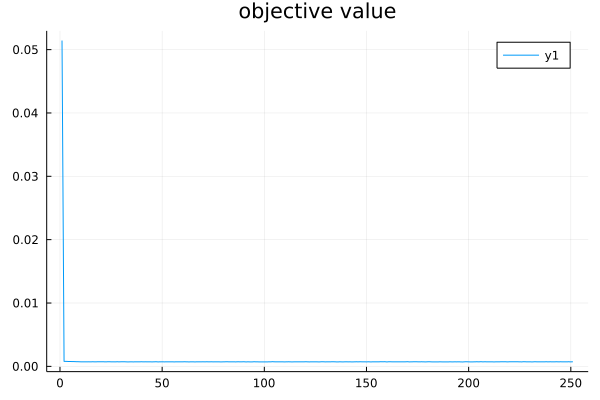

In [13]:
#Plot
plot( store_obj, title = "objective value" )
#DONE

In [14]:
#Solution
print( "w = ", x_log[1:7], " b = ", x_log[8], "\n \n" )
#DONE

w = [0.9461134371593425, 0.021868711973219226, -0.10792650771771395, 0.2965769676137988, -0.00948640472682797, 0.0445906282912491, 0.052026711120149595] b = -0.7091008634534666
 


In [15]:
#Print Error Rate
print( "train error = ", error_rate( feat_vec_all_full, label_vec_all_full, x_log[1:7] , x_log[8] ), 
   " test error = ", error_rate( feat_vec_all_full_test, label_vec_all_full_test, x_log[1:7] , x_log[8] )  )
#DONE

train error = 0.2981329170919133 test error = 0.3674792084886722

In [16]:
#weight on `RevolvingUtilizationOfUnsecuredLines'
k = 0;
for i in 1:7
    k += sqrt(x_log[i]^2)
end
println(x_log[1]/k)

0.6398757202303544
